### Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

In [2]:
df = pd.read_csv("C:/Users/79539/Algotrade/market_data_train.csv")
df["time"] = pd.to_datetime(df["time"], format = "%Y-%m-%d %H:%M:%S")
df = df.set_index(["time"])

In [3]:
df.head()

,symbol,open,high,low,close,market_cap,n_trades,volume,taker_buy_volume
time,,,,,,,,,
2020-12-25 06:00:00,1INCH,0.2000,3.0885,0.2000,2.5826,6.707592e+07,48768,3.553052e+07,1.724763e+07
2020-12-25 07:00:00,1INCH,2.5824,2.6900,2.2249,2.5059,6.508385e+07,31099,2.244087e+07,9.861481e+06
2020-12-25 08:00:00,1INCH,2.5152,2.8870,2.3609,2.6237,6.814338e+07,33001,2.130043e+07,1.160785e+07
2020-12-25 09:00:00,1INCH,2.6318,2.8247,2.4650,2.6134,6.787587e+07,30459,1.749181e+07,9.087566e+06
2020-12-25 10:00:00,1INCH,2.6104,2.7498,2.5629,2.6365,6.847583e+07,21023,9.919400e+06,4.798067e+06


In [4]:
df.tail()

,symbol,open,high,low,close,market_cap,n_trades,volume,taker_buy_volume
time,,,,,,,,,
2021-05-31 16:00:00,ZRX,0.9755,1.0160,0.9731,1.0149,854465854.0,1745,528376.40,284762.40
2021-05-31 17:00:00,ZRX,1.0147,1.0200,0.9871,1.0047,845878258.0,1451,398068.70,161734.60
2021-05-31 18:00:00,ZRX,1.0064,1.0077,0.9830,0.9884,832154941.0,894,226835.60,72763.05
2021-05-31 19:00:00,ZRX,0.9889,0.9905,0.9827,0.9865,830555291.0,346,76154.35,38047.57
2021-05-31 20:00:00,ZRX,0.9882,0.9998,0.9859,0.9988,840910922.0,304,55675.59,27282.24


In [5]:
df["symbol"].unique()

array(['1INCH', 'AAVE', 'ACM', 'ADA', 'AION', 'AKRO', 'ALGO', 'ALICE',
       'ALPHA', 'ANKR', 'ANT', 'AR', 'ARDR', 'ARPA', 'ASR', 'ATM', 'ATOM',
       'AUDIO', 'AUTO', 'AVA', 'AVAX', 'AXS', 'BADGER', 'BAKE', 'BAL',
       'BAND', 'BAR', 'BAT', 'BCH', 'BEAM', 'BEL', 'BLZ', 'BNB', 'BNT',
       'BTC', 'BTCST', 'BTG', 'BTS', 'BTT', 'BURGER', 'BZRX', 'CAKE',
       'CELO', 'CELR', 'CFX', 'CHR', 'CHZ', 'CKB', 'COCOS', 'COMP', 'COS',
       'COTI', 'CRV', 'CTK', 'CTSI', 'CTXC', 'CVC', 'DASH', 'DATA', 'DCR',
       'DEGO', 'DENT', 'DGB', 'DIA', 'DNT', 'DOCK', 'DODO', 'DOGE', 'DOT',
       'DREP', 'DUSK', 'EGLD', 'ENJ', 'EOS', 'EPS', 'ETC', 'ETH', 'FET',
       'FIL', 'FIO', 'FIRO', 'FIS', 'FLM', 'FORTH', 'FTM', 'FTT', 'FUN',
       'GRT', 'GTO', 'GXS', 'HARD', 'HBAR', 'HIVE', 'HNT', 'HOT', 'ICP',
       'ICX', 'INJ', 'IOST', 'IOTA', 'IOTX', 'IRIS', 'JST', 'JUV', 'KAVA',
       'KEY', 'KMD', 'KNC', 'KSM', 'LINA', 'LINK', 'LIT', 'LPT', 'LRC',
       'LSK', 'LTC', 'LTO', 'LUNA', 'MANA', 'MASK'

Мы имеем почасовые данные с конца 2020 г. до июня 2021 г. по 219 тикерам. В целях ускорения работы мы переходим к дневным данным, используя правила ниже.

In [6]:
# переходим к дневным данным, используя agg
result = []
std = []

# цикл по всем валютам, потому что у каждой валюты разный срок жизни
for product in tqdm(df["symbol"].unique()):
    temp = df[df["symbol"] == product]
    temp.index = pd.to_datetime(temp.index, format = "%Y-%m-%d %H:%M:%S")
    
    temp_days = temp.resample("D").agg({"open" : "first", "high" : "max",
                                       "low" : "min", "close" : "last", 
                                       "market_cap" : "last", "n_trades" : "sum",
                                       "volume" : "sum", "taker_buy_volume" : "sum"})
    temp_days["symbol"] = product
    result.append(temp_days)
    
df = pd.concat(result)

100%|████████████████████████████████████████████████████████████████████████████████| 219/219 [00:19<00:00, 11.47it/s]


В качестве мер сравнения торговых стратегий используются коэффициент Шарпа, коэффициент Сортино, проценты максимальной просадки и доходность. Они были выбраны в качестве мер, поскольку: а) широко применяются в анализе инвестиционных инструментов; б) коэффициент Шарпа схватывает только волатильность; в) коэффициент Сортино делает поправку на нисходящую волатильность.

In [7]:
def sharpe_ratio(return_series, N, rf):
    mean = return_series.mean() * N -rf
    sigma = return_series.std() * np.sqrt(N)
    return mean / sigma

def sortino_ratio(series, N, rf):
    mean = series.mean() * N -rf
    std_neg = series[series < 0].std() * np.sqrt(N)
    return mean / std_neg

def max_drawdown(return_series):
    comp_ret = (return_series + 1).cumprod()
    peak = comp_ret.expanding(min_periods = 1).max()
    dd = (comp_ret / peak) - 1
    return dd.min()

def profitability(return_series, N):
    profitability = (return_series.iloc[-1] / return_series.iloc[0])
    tenor = (len(return_series) / N)
    return profitability / tenor

strategy = pd.DataFrame(columns = ["strategy", "sharpes",
                                  "sortinos", "max_drawdowns",
                                  "profitability"])

### Strategy 1: Buy BTC

Первая стратегия заключается в покупке биткоина и удержания без ребалансировок. Данная стратегия также называется buy&hold.

In [8]:
class BackTest:
    def __init__(self):
        self.account = 100000
        self.account_history = []
        self.portfolio = {}
        self.portfolio_history = []
        self.dates = []
        self.commission = 0.0025
        
    def run(self, data):
        instrument = "BTC"
        # в цикле ходим по датам
        for date in tqdm(sorted(df.index.unique())):
            today = df[df.index == date]
            # если это первая дата, то покупаем BTC
            if (date == sorted(df.index.unique())[0]):
                close = today[today["symbol"] ==
                              instrument]["close"].values[0]
                self.portfolio[instrument] = self.account / (close * (1 + self.commission))
                self.account -= close * (1 + self.commission) * self.portfolio[instrument]
            # записываем историю счёта и портфолио
            self.portfolio_history.append(self.portfolio)
            self.account_history.append(self.account + 
                                        today[today["symbol"] == instrument]["close"].values * self.portfolio[instrument])
            self.dates.append(date)
        
BackTest = BackTest()
BackTest.run(df)

100%|█████████████████████████████████████████████████████████████████████████████| 1247/1247 [00:03<00:00, 411.72it/s]


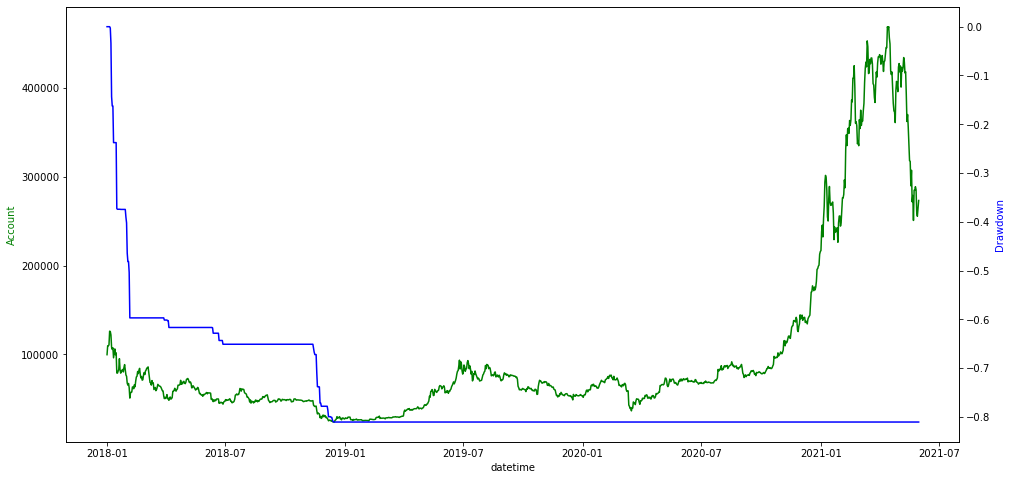

In [9]:
result = pd.DataFrame(BackTest.account_history,
                      index = BackTest.dates,
                      columns = ["account"])

hold_BTC = result["account"]

result["Roll_Max"] = result["account"].cummax()
result["Daily_Drawdown"] = (result["account"] / result["Roll_Max"] - 1.0)
result["Max_Daily_Drawdown"] = result["Daily_Drawdown"].cummin()

fig, ax1 = plt.subplots(figsize = (16, 8))

ax2 = ax1.twinx()
ax1.plot(result.index, result["account"], "g-")
ax2.plot(result.index, result["Max_Daily_Drawdown"], "b-")

ax1.set_xlabel("datetime")
ax1.set_ylabel("Account", color = "g")
ax2.set_ylabel("Drawdown", color = "b")

plt.show()

На графике зелёным цветом указана динамика счёта и синим цветом отображена динамика максимальной просадки в процентах.

In [10]:
N = 252 # количество дней
rf = 0.00 # безрисковая ставка

pct = result["account"].pct_change().dropna()

sharpes = sharpe_ratio(pct, N, rf)
sortinos = sortino_ratio(pct, N, rf)
max_drawdowns = max_drawdown(pct)
profit = profitability(result["account"], N)

strategy = strategy.append({"strategy" : "BTC",
                            "sharpes" : sharpes,
                            "sortinos" : sortinos,
                            "max_drawdowns" : max_drawdowns,
                            "profitability" : profit},
                           ignore_index = True)

print("sharpes: ", sharpes)
print("sortinos: ", sortinos)
print("max_drawdown: ", max_drawdowns)
print("profitability: ", profit)

sharpes:  0.6420057761290106
sortinos:  0.8439565296252444
max_drawdown:  -0.8104934035823226
profitability:  0.5537908786618659


Результатом является коэфициент Шарпа 0.64, коэффициент Сортино 0.84, максимальная просадка 81% и доходность 55%.

### Strategy 2: Buy BTC and ETH

Вторая стратегия заключается в покупке биткоина и эфириума в равных пропорациях и выполнение балансировки каждый день так, чтобы они оставались каждый день в равных пропорциях.

In [11]:
class BackTest:
    def __init__(self):
        self.account = 100000
        self.account_history = []
        self.portfolio = {}
        self.portfolio_history = []
        self.dates = []
        self.commission = 0.0025
        
    # функция для нахождения стоимости портфеля на сегодня
    def find_cost(self, today):
        today_cost = 0
        for i in self.portfolio.keys():
            today_cost += today[today["symbol"] == i]["close"].values[0] * self.portfolio[i]
        return today_cost
        
    def run(self, data):
        # в цикле идем по датам
        for date in tqdm(sorted(df.index.unique())):
            today = df[df.index == date]
            # если это первая дата, то покупаем равными частями BTC и ЕTH
            if (date == sorted(df.index.unique())[0]):
                for i in ["BTC", "ETH"]:
                    close = today[today["symbol"] == i]["close"].values[0]
                    self.portfolio[i] = (100000 / 2) / (close * (1 + self.commission))
                    self.account -= close * (1 + self.commission) * self.portfolio[i]
            # цена закрытия на сегодня
            close_BTC = today[today["symbol"] == "BTC"]["close"].values
            close_ETH = today[today["symbol"] == "ETH"]["close"].values
            # суммарная стоимость портфеля ценной бумаги
            portfolio_BTC = close_BTC * self.portfolio["BTC"]
            portfolio_ETH = close_ETH * self.portfolio["ETH"]
                
            if (portfolio_BTC != portfolio_ETH):
                # если BTC больше, то в цикле продаём маленькими частями BTC и покупаем ETH
                if (portfolio_BTC > portfolio_ETH) : # продажа BTC
                    while True: 
                        portfolio_BTC = close_BTC * self.portfolio["BTC"]
                        portfolio_ETH = close_ETH * self.portfolio["ETH"]
                            
                        # если ETH стало больше, то выходим из цикла
                        if (portfolio_BTC < portfolio_ETH):
                            break
                                
                        self.portfolio["BTC"] -= 0.001
                        money = close_BTC * 0.001
                        ETH = money / (close_ETH + (1 + self.commission))
                        self.portfolio["ETH"] += ETH
                            
                # если ETH больше, то в цикле продаём маленькими частями ETH и покупаем BTC
                if (portfolio_BTC < portfolio_ETH) : # покупка BTC
                    while True: 
                        portfolio_BTC = close_BTC * self.portfolio["BTC"]
                        portfolio_ETH = close_ETH * self.portfolio["ETH"]
                            
                        # если ETH стало больше, то выходим из цикла
                        if (portfolio_BTC > portfolio_ETH):
                            break
                                
                        self.portfolio["ETH"] -= 0.001
                        money = close_ETH * 0.001
                        BTC = money / (close_BTC + (1 + self.commission))
                        self.portfolio["BTC"] += BTC
                            
            # записываем история счёта и портфолио
            self.portfolio_history.append(self.portfolio)
                
            today_cost = self.find_cost(today)
            self.account_history.append(self.account + today_cost)
            self.dates.append(date)
    
BackTest = BackTest()
BackTest.run(df)

100%|█████████████████████████████████████████████████████████████████████████████| 1247/1247 [00:07<00:00, 173.11it/s]


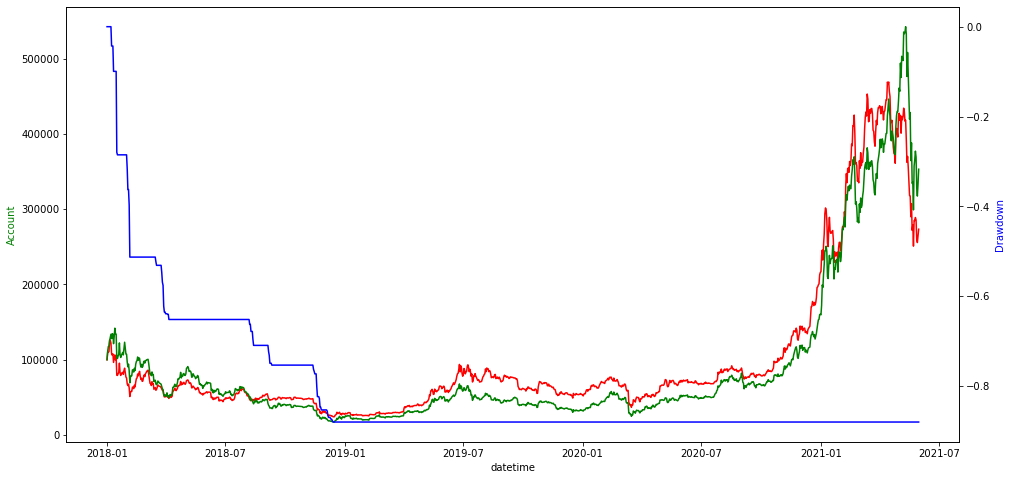

In [12]:
result = pd.DataFrame(BackTest.account_history,
                      index = BackTest.dates,
                      columns = ["account"])

result["Roll_Max"] = result["account"].cummax()
result["Daily_Drawdown"] = (result["account"] / result["Roll_Max"] - 1.0)
result["Max_Daily_Drawdown"] = result["Daily_Drawdown"].cummin()

fig, ax1 = plt.subplots(figsize = (16, 8))

ax2 = ax1.twinx()
ax1.plot(result.index, hold_BTC, 'r-')
ax1.plot(result.index, result["account"], "g-")
ax2.plot(result.index, result["Max_Daily_Drawdown"], "b-")

ax1.set_xlabel("datetime")
ax1.set_ylabel("Account", color = "g")
ax2.set_ylabel("Drawdown", color = "b")

plt.show()

Зелёным цветом изображена тестируемая стратегия. Красным бенчмарк первой стратегии. Синим изображается максимальная просадка.

In [13]:
N = 252 # количество дней
rf = 0.00 # безрисковая ставка

pct = result["account"].pct_change().dropna()

sharpes = sharpe_ratio(pct, N, rf)
sortinos = sortino_ratio(pct, N, rf)
max_drawdowns = max_drawdown(pct)
profit = profitability(result["account"], N)

strategy = strategy.append({"strategy" : "BTC & ETH",
                            "sharpes" : sharpes,
                            "sortinos" : sortinos,
                            "max_drawdowns" : max_drawdowns,
                            "profitability" : profit},
                           ignore_index = True)

print("sharpes: ", sharpes)
print("sortinos: ", sortinos)
print("max_drawdown: ", max_drawdowns)
print("profitability: ", profit)

sharpes:  0.7222059751661559
sortinos:  0.9344316635468709
max_drawdown:  -0.8802676286123532
profitability:  0.7153877286657272


Результатом является коэфициент Шарпа 0.72, коэффициент Сортино 0.93, максимальная просадка 88% и доходность 71%.

### Strategy 3: TOP 10 capitalized

В третьей стратегии мы покупаем топ-10 самых капитализируемых валют и делаем ребалансировку каждый день, чтобы удерживать имеющуюся пропорцию.

In [14]:
class BackTest:
    def __init__(self):
        self.account = 100000
        self.account_history = []
        self.portfolio = {}
        self.portfolio_history = []
        self.dates = []
        self.commission = 0.0025
        
    # функция для нахождения стоимости портфеля на сегодня
    def find_cost(self, today):
        today_cost = 0
        for i in self.portfolio.keys():
            today_cost += today[today["symbol"] == i]["close"].values[0] * self.portfolio[i]
        return today_cost
        
    def run(self, data, count = 10):
        # в цикле идем по датам
        for date in tqdm(sorted(df.index.unique())):
            today = df[df.index == date]
            # получаем тикеры 10 наиболее капитализированных активов
            instruments = today.sort_values(by = ["market_cap"], ascending = False)[:count]["symbol"]
            
            # если это первая дата, то покупаем равными частями
            if (date == sorted(df.index.unique())[0]):
                for i in instruments:
                    close = today[today["symbol"] == i]["close"].values[0]
                    self.portfolio[i] = (100000 / len(instruments)) / (close * (1 + self.commission))
                    self.account -= close * self.portfolio[i] * (1 + self.commission)
                    
            # считаем среднюю цену на сегодня для активов
            equal_cost = (self.find_cost(today) + self.account) / len(instruments)
            
            # продаем все активы, которые перестали входить в топ-10
            for i in list(set(self.portfolio) - set(instruments)):
                close = today[today["symbol"] == i]["close"].values[0]
                self.account += close * self.portfolio[i]
                del self.portfolio[i]
                
            for i in instruments:
                # получаем цену на сегодня
                close = today[today["symbol"] == i]["close"].values[0]
                # получаем сумму, на которую у нас в портфолио этого актива
                try:
                    now = self.portfolio[i] * close
                except Exception:
                    now = 0
                    self.portfolio[i] = 0
                    
                if ((equal_cost - now) > 0.01): # если нам его не хватает, то покупаем
                    difference = equal_cost - now # считаем разницу
                    # вычисляем, сколько нужно купить для равенства
                    self.portfolio[i] += difference / (close * (1 + self.commission))
                    self.account -= close * (difference / (close * (1 + self.commission)))
                    
                elif ((now - equal_cost) > 0.01): # если у нас его больше, то продаём
                    difference = now - equal_cost # считаем разницу
                    # вычисляем, сколько нужно продать для равенства
                    self.portfolio[i] -= difference / close
                    self.account += close * (difference / close)
                    
            # записываем историю счета и портфолио
            self.portfolio_history.append(self.portfolio.copy())
            
            today_cost = self.find_cost(today)
            self.account_history.append(self.account + today_cost)
            self.dates.append(date)

100%|█████████████████████████████████████████████████████████████████████████████| 1247/1247 [00:11<00:00, 104.91it/s]


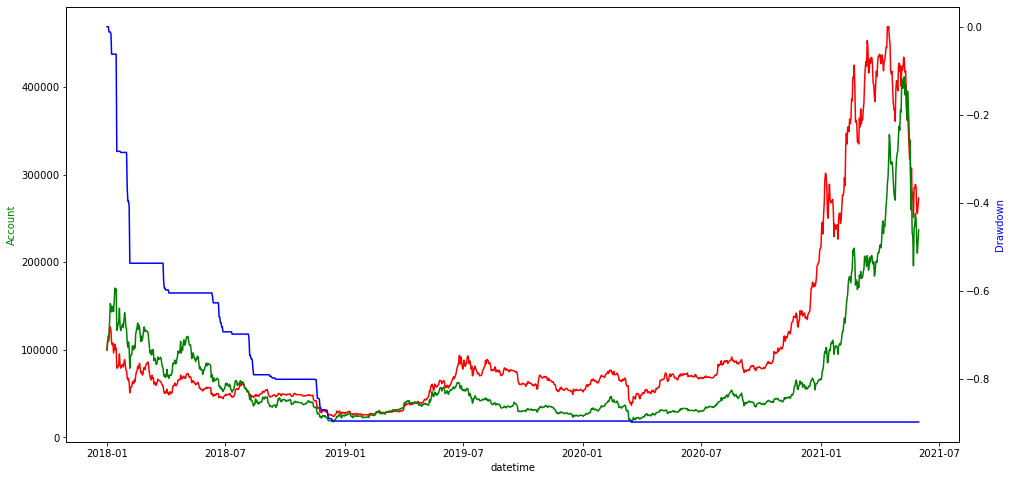

In [15]:
BackTest_10 = BackTest()
BackTest_10.run(df, count = 10)

result = pd.DataFrame(BackTest_10.account_history,
                     index = BackTest_10.dates,
                     columns = ["account"])

result["Roll_Max"] = result["account"].cummax()
result["Daily_Drawdown"] = (result["account"] / result["Roll_Max"] - 1.0)
result["Max_Daily_Drawdown"] = result["Daily_Drawdown"].cummin()

fig, ax1 = plt.subplots(figsize = (16, 8))

ax2 = ax1.twinx()

ax1.plot(result.index, hold_BTC, 'r-')
ax1.plot(result.index, result["account"], "g-")
ax2.plot(result.index, result["Max_Daily_Drawdown"], "b-")

ax1.set_xlabel("datetime")
ax1.set_ylabel("Account", color = "g")
ax2.set_ylabel("Drawdown", color = "b")

plt.show()

Зелёным цветом изображена тестируемая стратегия. Красным бенчмарк первой стратегии. Синим изображается максимальная просадка.

In [16]:
N = 252 # количество дней
rf = 0.00 # безрисковая ставка

pct = result["account"].pct_change().dropna()

sharpes = sharpe_ratio(pct, N, rf)
sortinos = sortino_ratio(pct, N, rf)
max_drawdowns = max_drawdown(pct)
profit = profitability(result["account"], N)

strategy = strategy.append({"strategy" : "TOP10 capitalized",
                            "sharpes" : sharpes,
                            "sortinos" : sortinos,
                            "max_drawdowns" : max_drawdowns,
                            "profitability" : profit},
                           ignore_index = True)

print("sharpes: ", sharpes)
print("sortinos: ", sortinos)
print("max_drawdown: ", max_drawdowns)
print("profitability: ", profit)

sharpes:  0.6205318929057971
sortinos:  0.8078932692320473
max_drawdown:  -0.8980118189540794
profitability:  0.47979408379529775


Результатом является коэфициент Шарпа 0.62, коэффициент Сортино 0.81, максимальная просадка 90% и доходность 48%.

### Strategy 4: TOP 5 capitalized

В четвёртой стратегии мы покупаем топ-5 самых капитализируемых валют и делаем ребалансировку каждый день, чтобы удерживать имеющуюся пропорцию.

In [17]:
class BackTest:
    def __init__(self):
        self.account = 100000
        self.account_history = []
        self.portfolio = {}
        self.portfolio_history = []
        self.dates = []
        self.commission = 0.0025
        
    # функция для нахождения стоимости портфеля на сегодня
    def find_cost(self, today):
        today_cost = 0
        for i in self.portfolio.keys():
            today_cost += today[today["symbol"] == i]["close"].values[0] * self.portfolio[i]
        return today_cost
        
    def run(self, data, count = 5):
        # в цикле идем по датам
        for date in tqdm(sorted(df.index.unique())):
            today = df[df.index == date]
            # получаем тикеры 5 наиболее капитализированных активов
            instruments = today.sort_values(by = ["market_cap"], ascending = False)[:count]["symbol"]
            
            # если это первая дата, то покупаем равными частями
            if (date == sorted(df.index.unique())[0]):
                for i in instruments:
                    close = today[today["symbol"] == i]["close"].values[0]
                    self.portfolio[i] = (100000 / len(instruments)) / (close * (1 + self.commission))
                    self.account -= close * self.portfolio[i] * (1 + self.commission)
                    
            # считаем среднюю цену на сегодня для активов
            equal_cost = (self.find_cost(today) + self.account) / len(instruments)
            
            # продаем все активы, которые перестали входить в топ-5
            for i in list(set(self.portfolio) - set(instruments)):
                close = today[today["symbol"] == i]["close"].values[0]
                self.account += close * self.portfolio[i]
                del self.portfolio[i]
                
            for i in instruments:
                # получаем цену на сегодня
                close = today[today["symbol"] == i]["close"].values[0]
                # получаем сумму, на которую у нас в портфолио этого актива
                try:
                    now = self.portfolio[i] * close
                except Exception:
                    now = 0
                    self.portfolio[i] = 0
                    
                if ((equal_cost - now) > 0.01): # если нам его не хватает, то покупаем
                    difference = equal_cost - now # считаем разницу
                    # вычисляем, сколько нужно купить для равенства
                    self.portfolio[i] += difference / (close * (1 + self.commission))
                    self.account -= close * (difference / (close * (1 + self.commission)))
                    
                elif ((now - equal_cost) > 0.01): # если у нас его больше, то продаём
                    difference = now - equal_cost # считаем разницу
                    # вычисляем, сколько нужно продать для равенства
                    self.portfolio[i] -= difference / close
                    self.account += close * (difference / close)
                    
            # записываем историю счета и портфолио
            self.portfolio_history.append(self.portfolio.copy())
            
            today_cost = self.find_cost(today)
            self.account_history.append(self.account + today_cost)
            self.dates.append(date)

100%|█████████████████████████████████████████████████████████████████████████████| 1247/1247 [00:07<00:00, 162.12it/s]


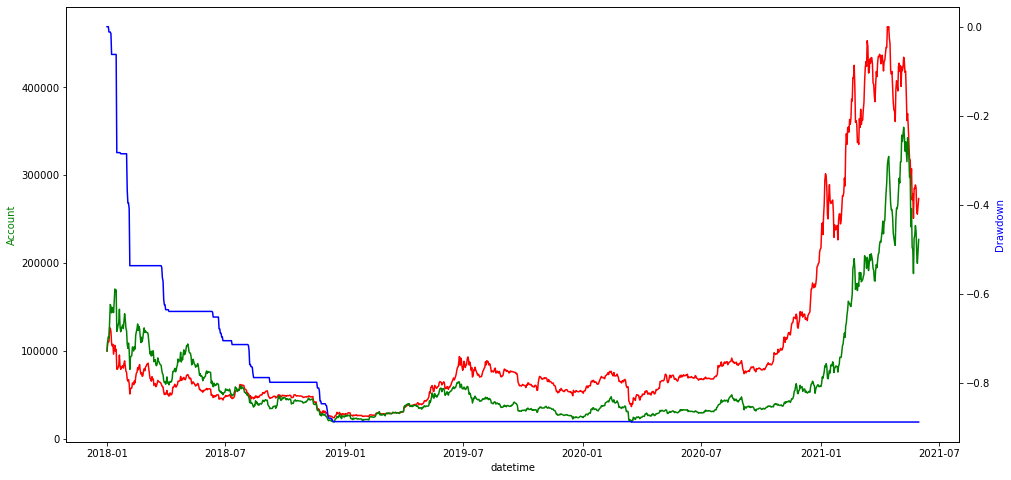

In [18]:
BackTest_5 = BackTest()
BackTest_5.run(df, count = 5)

result = pd.DataFrame(BackTest_5.account_history,
                     index = BackTest_5.dates,
                     columns = ["account"])

result["Roll_Max"] = result["account"].cummax()
result["Daily_Drawdown"] = (result["account"] / result["Roll_Max"] - 1.0)
result["Max_Daily_Drawdown"] = result["Daily_Drawdown"].cummin()

fig, ax1 = plt.subplots(figsize = (16, 8))

ax2 = ax1.twinx()

ax1.plot(result.index, hold_BTC, 'r-')
ax1.plot(result.index, result["account"], "g-")
ax2.plot(result.index, result["Max_Daily_Drawdown"], "b-")

ax1.set_xlabel("datetime")
ax1.set_ylabel("Account", color = "g")
ax2.set_ylabel("Drawdown", color = "b")

plt.show()

Зелёным цветом изображена тестируемая стратегия. Красным бенчмарк первой стратегии. Синим изображается максимальная просадка.

In [19]:
N = 252 # количество дней
rf = 0.00 # безрисковая ставка

pct = result["account"].pct_change().dropna()

sharpes = sharpe_ratio(pct, N, rf)
sortinos = sortino_ratio(pct, N, rf)
max_drawdowns = max_drawdown(pct)
profit = profitability(result["account"], N)

strategy = strategy.append({"strategy" : "TOP5 capitalized",
                            "sharpes" : sharpes,
                            "sortinos" : sortinos,
                            "max_drawdowns" : max_drawdowns,
                            "profitability" : profit},
                           ignore_index = True)

print("sharpes: ", sharpes)
print("sortinos: ", sortinos)
print("max_drawdown: ", max_drawdowns)
print("profitability: ", profit)

sharpes:  0.6055768391597209
sortinos:  0.810624764398007
max_drawdown:  -0.8887528590718153
profitability:  0.45953923806162245


Результатом является коэфициент Шарпа 0.61, коэффициент Сортино 0.81, максимальная просадка 89% и доходность 46%.

### Strategy 5: TOP 20 capitalized

В четвёртой стратегии мы покупаем топ-20 самых капитализируемых валют и делаем ребалансировку каждый день, чтобы удерживать имеющуюся пропорцию.

In [20]:
class BackTest:
    def __init__(self):
        self.account = 100000
        self.account_history = []
        self.portfolio = {}
        self.portfolio_history = []
        self.dates = []
        self.commission = 0.0025
        
    # функция для нахождения стоимости портфеля на сегодня
    def find_cost(self, today):
        today_cost = 0
        for i in self.portfolio.keys():
            today_cost += today[today["symbol"] == i]["close"].values[0] * self.portfolio[i]
        return today_cost
        
    def run(self, data, count = 20):
        # в цикле идем по датам
        for date in tqdm(sorted(df.index.unique())):
            today = df[df.index == date]
            # получаем тикеры 20 наиболее капитализированных активов
            instruments = today.sort_values(by = ["market_cap"], ascending = False)[:count]["symbol"]
            
            # если это первая дата, то покупаем равными частями
            if (date == sorted(df.index.unique())[0]):
                for i in instruments:
                    close = today[today["symbol"] == i]["close"].values[0]
                    self.portfolio[i] = (100000 / len(instruments)) / (close * (1 + self.commission))
                    self.account -= close * self.portfolio[i] * (1 + self.commission)
                    
            # считаем среднюю цену на сегодня для активов
            equal_cost = (self.find_cost(today) + self.account) / len(instruments)
            
            # продаем все активы, которые перестали входить в топ-20
            for i in list(set(self.portfolio) - set(instruments)):
                close = today[today["symbol"] == i]["close"].values[0]
                self.account += close * self.portfolio[i]
                del self.portfolio[i]
                
            for i in instruments:
                # получаем цену на сегодня
                close = today[today["symbol"] == i]["close"].values[0]
                # получаем сумму, на которую у нас в портфолио этого актива
                try:
                    now = self.portfolio[i] * close
                except Exception:
                    now = 0
                    self.portfolio[i] = 0
                    
                if ((equal_cost - now) > 0.01): # если нам его не хватает, то покупаем
                    difference = equal_cost - now # считаем разницу
                    # вычисляем, сколько нужно купить для равенства
                    self.portfolio[i] += difference / (close * (1 + self.commission))
                    self.account -= close * (difference / (close * (1 + self.commission)))
                    
                elif ((now - equal_cost) > 0.01): # если у нас его больше, то продаём
                    difference = now - equal_cost # считаем разницу
                    # вычисляем, сколько нужно продать для равенства
                    self.portfolio[i] -= difference / close
                    self.account += close * (difference / close)
                    
            # записываем историю счета и портфолио
            self.portfolio_history.append(self.portfolio.copy())
            
            today_cost = self.find_cost(today)
            self.account_history.append(self.account + today_cost)
            self.dates.append(date)

100%|██████████████████████████████████████████████████████████████████████████████| 1247/1247 [00:20<00:00, 62.12it/s]


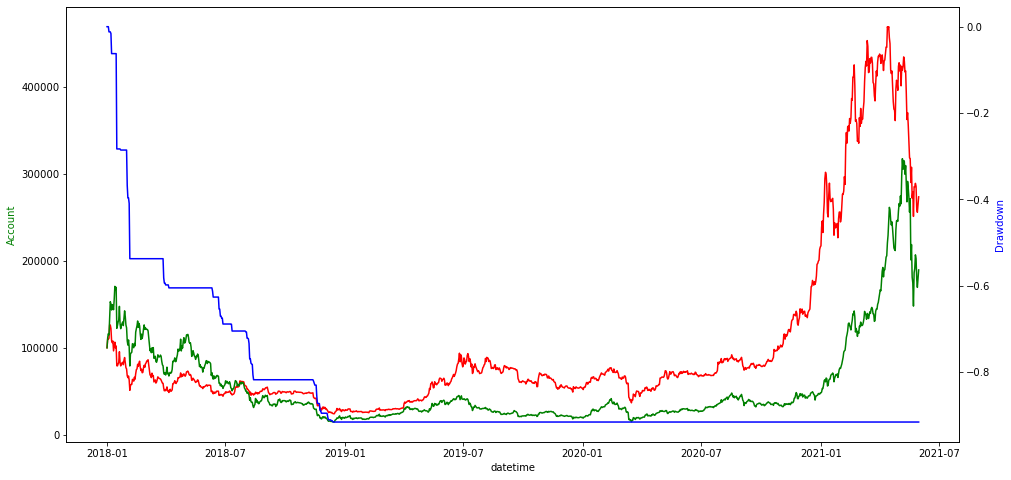

In [21]:
BackTest_20 = BackTest()
BackTest_20.run(df, count = 20)

result = pd.DataFrame(BackTest_20.account_history,
                     index = BackTest_20.dates,
                     columns = ["account"])

result["Roll_Max"] = result["account"].cummax()
result["Daily_Drawdown"] = (result["account"] / result["Roll_Max"] - 1.0)
result["Max_Daily_Drawdown"] = result["Daily_Drawdown"].cummin()

fig, ax1 = plt.subplots(figsize = (16, 8))

ax2 = ax1.twinx()

ax1.plot(result.index, hold_BTC, 'r-')
ax1.plot(result.index, result["account"], "g-")
ax2.plot(result.index, result["Max_Daily_Drawdown"], "b-")

ax1.set_xlabel("datetime")
ax1.set_ylabel("Account", color = "g")
ax2.set_ylabel("Drawdown", color = "b")

plt.show()

Зелёным цветом изображена тестируемая стратегия. Красным бенчмарк первой стратегии. Синим изображается максимальная просадка.

In [22]:
N = 252 # количество дней
rf = 0.00 # безрисковая ставка

pct = result["account"].pct_change().dropna()

sharpes = sharpe_ratio(pct, N, rf)
sortinos = sortino_ratio(pct, N, rf)
max_drawdowns = max_drawdown(pct)
profit = profitability(result["account"], N)

strategy = strategy.append({"strategy" : "TOP20 capitalized",
                            "sharpes" : sharpes,
                            "sortinos" : sortinos,
                            "max_drawdowns" : max_drawdowns,
                            "profitability" : profit},
                           ignore_index = True)

print("sharpes: ", sharpes)
print("sortinos: ", sortinos)
print("max_drawdown: ", max_drawdowns)
print("profitability: ", profit)

sharpes:  0.5618154123463943
sortinos:  0.7150154366608145
max_drawdown:  -0.915503812884227
profitability:  0.38355255252348786


Результатом является коэфициент Шарпа 0.56, коэффициент Сортино 0.72, максимальная просадка 92% и доходность 38%.

### Conclusion

In [23]:
strategy.head()

,strategy,sharpes,sortinos,max_drawdowns,profitability
0,BTC,0.642006,0.843957,-0.810493,0.553791
1,BTC & ETH,0.722206,0.934432,-0.880268,0.715388
2,TOP10 capitalized,0.620532,0.807893,-0.898012,0.479794
3,TOP5 capitalized,0.605577,0.810625,-0.888753,0.459539
4,TOP20 capitalized,0.561815,0.715015,-0.915504,0.383553


Исходя из текущей таблицы, можно сделать вывод, что оптимальной стратегией является покупка биткоина и эфириума в равных пропорциях с ежедневной ребалансировкой, поскольку эта стратегия показывает максимальные коэффициенты Шарпа и доходность. Альтернативой является покупка и удержание биткоина. Этот вариант удобней тем, что не требуется ребалансировка, при этом коэффициент Шарпа оказывается достаточно высоким.